## Importar librerías

In [1]:
!pip install -U gdown pydrive

In [ ]:
import cv2
import os
import math
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd

## Carga de archivos

In [ ]:
# Definir rutas y nombres
dataset_name = "GPTeam-DeepLearning/Dataset/bcn_20k_train"  # Nombre de la carpeta de imágenes
drive_mount_path = "/content/drive"
drive_dataset_path = f"{drive_mount_path}/My Drive/{dataset_name}"  # Ruta en Drive
folder_id = "1PPUxdAGNTM3Be1zbfzUUlY6xUelNZhM5"  # ID de la carpeta en Google Drive compartido

# Verificar si Google Drive ya está montado
if not os.path.exists(drive_mount_path):
    print("Montando Google Drive...")
    drive.mount(drive_mount_path)
else:
    print("Google Drive ya está montado.")

# Verificar si la carpeta ya existe en Google Drive
if os.path.exists(drive_dataset_path):
    print(f"Dataset encontrado en Google Drive: {drive_dataset_path}")
    dataset_path = drive_dataset_path
else:
    print("Dataset no encontrado en Google Drive. Procediendo con la descarga...")

    # Instalar gdown y descargar el dataset desde Drive
    !pip install -U gdown
    !gdown --folder --id {folder_id} --remaining-ok -O "{drive_dataset_path}"

    dataset_path = drive_dataset_path

print(f"Dataset disponible en: {dataset_path}")

dataset_address_descripcion_csv = "GPTeam-DeepLearning/Dataset/bcn_20k_train.csv"
drive_dataset_metadata_path = f"{drive_mount_path}/My Drive/{dataset_address_descripcion_csv}"
print(f"Metadata disponible en: {drive_dataset_metadata_path}")

Montando Google Drive...


NameError: name 'drive' is not defined

Alternativa a carga de archivos (Carga las imagenes desde un directorio local)

In [19]:
dataset_name = "GPTeam-DeepLearning/Dataset/bcn_20k_train"  # Nombre de la carpeta de imágenes
local_dataset_path = f"./content/{dataset_name}"  # Ruta local
dataset_path = local_dataset_path
print(f"Dataset disponible en: {dataset_path}")

dataset_address_descripcion_csv = "GPTeam-DeepLearning/Dataset/bcn_20k_train.csv"
local_dataset_metadata_path = f"./content/{dataset_address_descripcion_csv}"
metadata_dataset_path = local_dataset_metadata_path
print(f"Metadata disponible en: {metadata_dataset_path}")

Dataset disponible en: ./content/GPTeam-DeepLearning/Dataset/bcn_20k_train
Metadata disponible en: ./content/GPTeam-DeepLearning/Dataset/bcn_20k_train.csv


## Mostrar imagenes

In [20]:
def mostrar_grilla_imagenes(directorio, columnas=5, n_imagenes=25):
    # Obtener la lista de imágenes en el directorio
    imagenes = [f for f in os.listdir(directorio) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    imagenes = imagenes[:n_imagenes]  # Tomar solo las primeras n imágenes disponibles

    if not imagenes:
        print("No se encontraron imágenes en el directorio.")
        return

    # Calcular filas necesarias
    filas = math.ceil(len(imagenes) / columnas)  # Redondeo hacia arriba

    # Obtener el nombre del directorio para la cabecera
    nombre_directorio = os.path.basename(directorio)

    # Crear la figura con el tamaño ajustado
    fig, axes = plt.subplots(filas, columnas, figsize=(columnas * 2, filas * 2))
    fig.suptitle(f"📂 {nombre_directorio}", fontsize=16, fontweight='bold', y=1.05)  # Cabecera
    axes = axes.flatten()  # Convertir la matriz de ejes en lista

    # Mostrar imágenes en la grilla
    for i, ax in enumerate(axes):
        if i < len(imagenes):
            img_path = os.path.join(directorio, imagenes[i])
            img = cv2.imread(img_path)  # Cargar imagen
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
            ax.imshow(img)
            ax.set_title(imagenes[i], fontsize=8)  # Nombre del archivo
        ax.axis("off")  # Ocultar ejes

    # Ajustar diseño
    plt.tight_layout()
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13608\2777083457.py:32: UserWarning: Glyph 128194 (\N{OPEN FILE FOLDER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\PUCP\Cursos electivos\Deep Learning\Proyecto General\Proyecto\Deep-Learning---Proyecto\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128194 (\N{OPEN FILE FOLDER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


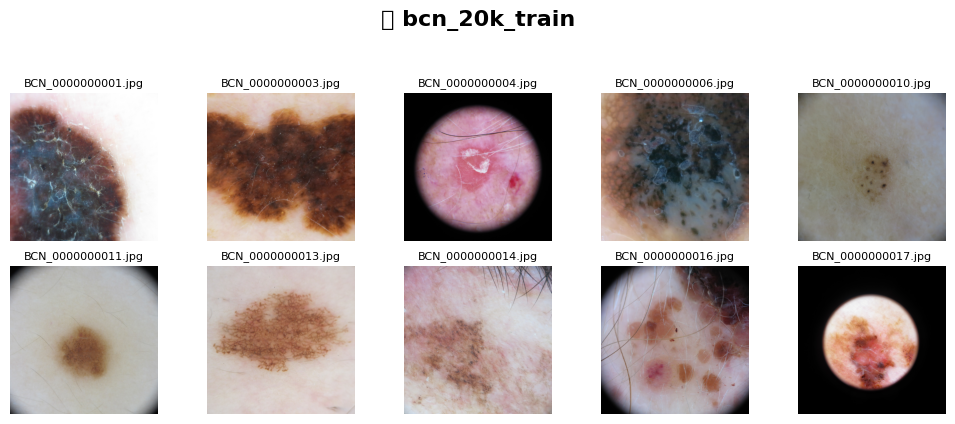

In [21]:
mostrar_grilla_imagenes(dataset_path, columnas=5, n_imagenes=10)

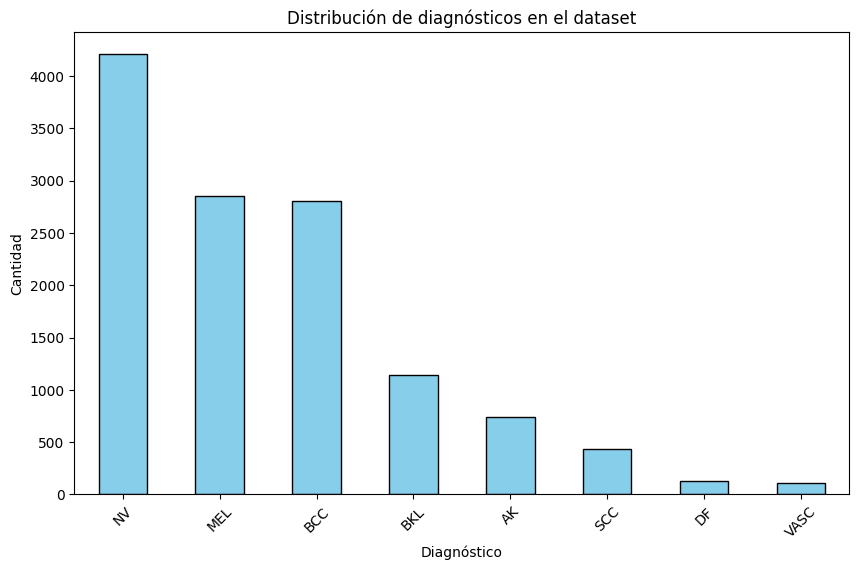

In [22]:
df = pd.read_csv(metadata_dataset_path)
diagnosis_counts = df['diagnosis'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
diagnosis_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Configurar etiquetas y título
plt.xlabel("Diagnóstico")
plt.ylabel("Cantidad")
plt.title("Distribución de diagnósticos en el dataset")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad

# Mostrar el gráfico
plt.show()

In [19]:
len(df)

12413